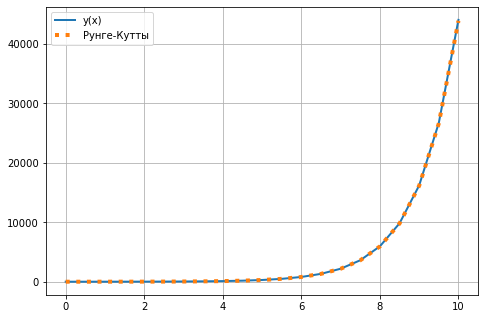

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

x, y = symbols('x y')

def ode_runge_kutta(f, xs, x0, y0, n, h):
    u = [y0]
    for i in range(n):
        k1 = f(xs[i], u[i])
        k2 = f(xs[i] + h / 4, u[i] + h * k1 / 4)
        k3 = f(xs[i] + h / 2, u[i] + h * k2 / 2)
        k4 = f(xs[i + 1], u[i] + h * k1 - 2 * h * k2 + 2 * h * k3)
        u.append( u[i] + h * (k1 + 4 * k3 + k4) / 6)
    return u

a, b = 0, 10
n = 20
h = (b - a) / n
xs = [a + i * h for i in range(n + 1)]
x0 = a
y0 = 1

f = lambda x_, y_ : (x + y).subs({x: x_, y: y_})
res = 2 * exp(x) - x - 1

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(xs, list(map(lambda xi: res.subs(x, xi), xs)), label='y(x)', linewidth=2)
ax.plot(xs, ode_runge_kutta(f, xs, x0, y0, n, h), label='Рунге-Кутты', linewidth=4, linestyle=':')
ax.legend()
plt.grid()
plt.show()